# ORIE 4580/5580/5581 Assignment 6

#### Students: K. Bond (klb298)

### Github link: [example Github link](https://github.com/kimbond0071/ORIE5580Homeworks/tree/main)

If the imbedded link doesn't work:
https://github.com/kimbond0071/ORIE5580Homeworks/tree/main


### Instructions


* Due Thursday, November 6, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Essential reading

The chapters on [Poisson Process](https://canvas.cornell.edu/courses/80773/modules/items/3269525), [DTMCs](https://canvas.cornell.edu/courses/80773/modules/items/3426077) and [CTMCs](https://canvas.cornell.edu/courses/80773/modules/items/3426086) from Mor Harchol-Balter, posted on Canvas

<hr><hr>

# Question 1 (The Spotify Shuffle)

**(a)** (10 pts) You have a Spotify playlist with $n$ songs playing on shuffle. Suppose Spotify truly picks a random song each time -- you want to see how many songs it takes on average to play **every song** on your playlist. Build a simulator to estimate this for a different values of $n$, and use this to try and guess the function.

*Note 1*: We saw this in class as the `coupon collector' problem -- we also saw a way to compute the exact expected time in an earlier clicker question...

*Note 2*: Try and pick a large range of $n$ to get a sense of the function, and also make sure you always show your CIs!


<hr>

## Ans.

n=   5 | mean≈      11.3 | 95% CI=(      11.1,       11.5) | mean/(n log n)≈ 1.401
n=  10 | mean≈      29.4 | 95% CI=(      29.0,       29.9) | mean/(n log n)≈ 1.278
n=  20 | mean≈      72.4 | 95% CI=(      71.3,       73.4) | mean/(n log n)≈ 1.208
n=  50 | mean≈     226.3 | 95% CI=(     223.5,      229.1) | mean/(n log n)≈ 1.157
n= 100 | mean≈     522.8 | 95% CI=(     517.3,      528.4) | mean/(n log n)≈ 1.135
n= 200 | mean≈    1177.7 | 95% CI=(    1166.6,     1188.8) | mean/(n log n)≈ 1.111
n= 500 | mean≈    3356.1 | 95% CI=(    3328.3,     3383.8) | mean/(n log n)≈ 1.080
n=1000 | mean≈    7510.3 | 95% CI=(    7453.8,     7566.8) | mean/(n log n)≈ 1.087


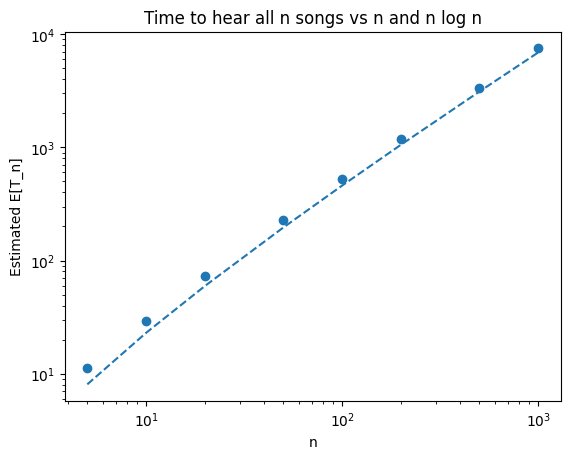

In [ ]:
# First Draft written with ChatGPT
import numpy as np

def time_to_hear_all_songs(n, rng=None):
    """
    Simulate the number of plays needed until all n songs
    have been heard at least once.
    """
    if rng is None:
        rng = np.random.default_rng()

    seen = np.zeros(n, dtype=bool)
    num_seen = 0
    t = 0

    while num_seen < n:
        song = rng.integers(0, n)  # uniform over {0,...,n-1}
        t += 1
        if not seen[song]:
            seen[song] = True
            num_seen += 1

    return t

def estimate_mean_time(n, R=2000, alpha=0.05, rng=None):
    """
    Estimate E[T_n] where T_n is time to hear all n songs.
    Returns (mean_est, halfwidth, std_est).
    """
    if rng is None:
        rng = np.random.default_rng()

    samples = np.array([time_to_hear_all_songs(n, rng) for _ in range(R)])
    mean_est = samples.mean()
    std_est = samples.std(ddof=1)

    z = 1.96  # for ~95% CI
    halfwidth = z * std_est / np.sqrt(R)
    return mean_est, halfwidth, std_est
ns = [5, 10, 20, 50, 100, 200, 500, 1000]
results = []

rng = np.random.default_rng(123)

for n in ns:
    mean_est, halfwidth, std_est = estimate_mean_time(n, R=2000, rng=rng)
    lower = mean_est - halfwidth
    upper = mean_est + halfwidth

    # Useful to compare with n * log n
    n_log_n = n * np.log(n)
    ratio = mean_est / n_log_n

    results.append((n, mean_est, lower, upper, ratio))

    print(f"n={n:4d} | mean≈{mean_est:10.1f} | 95% CI=({lower:10.1f}, {upper:10.1f}) | mean/(n log n)≈{ratio:6.3f}")

import matplotlib.pyplot as plt

n_vals = np.array([r[0] for r in results])
means  = np.array([r[1] for r in results])

plt.scatter(n_vals, means)
plt.plot(n_vals, n_vals * np.log(n_vals), linestyle='--')
plt.xlabel("n")
plt.ylabel("Estimated E[T_n]")
plt.title("Time to hear all n songs vs n and n log n")
plt.xscale("log")
plt.yscale("log")
plt.show()


<hr>

**(b)** (10 pts) Suppose Spotify uses the following poor randomizer: it labels songs as $\{0,1,2,\ldots,n-1\}$, and after playing a song $i$, it then either plays song $(i+1) mod(n)$ or $(i-1)mod(n)$ with probability $1/2$ (i.e., the next or previous song, imagining the songs to be in a ring with $n-1$ wrapping around to $1$). Simulate this randomizer for $n=20$, assuming you always start at song $1$, and find the histogram of the *last song to be played* for the first time using this shuffler.   


<hr>

## Ans.

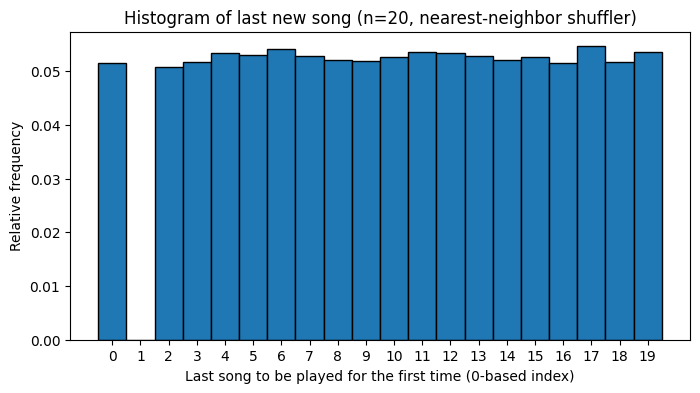

Song  0: P_hat ≈ 0.0516
Song  1: P_hat ≈ 0.0000
Song  2: P_hat ≈ 0.0508
Song  3: P_hat ≈ 0.0516
Song  4: P_hat ≈ 0.0534
Song  5: P_hat ≈ 0.0531
Song  6: P_hat ≈ 0.0541
Song  7: P_hat ≈ 0.0528
Song  8: P_hat ≈ 0.0520
Song  9: P_hat ≈ 0.0519
Song 10: P_hat ≈ 0.0526
Song 11: P_hat ≈ 0.0536
Song 12: P_hat ≈ 0.0534
Song 13: P_hat ≈ 0.0529
Song 14: P_hat ≈ 0.0521
Song 15: P_hat ≈ 0.0526
Song 16: P_hat ≈ 0.0516
Song 17: P_hat ≈ 0.0546
Song 18: P_hat ≈ 0.0518
Song 19: P_hat ≈ 0.0536


In [ ]:
#First draft written with ChatGPT
import numpy as np
import matplotlib.pyplot as plt

def simulate_last_new_song(n=20, rng=None, max_steps=10_000_000):
    """
    Simulate the bad Spotify shuffler on a ring of n songs.
    Start at song 1. At each step, move to (i+1) mod n or (i-1) mod n with prob 1/2.
    Return the label of the *last* song that is visited for the first time.
    """
    if rng is None:
        rng = np.random.default_rng()

    current = 1           # start at song 1 (labels 0,...,n-1)
    visited = np.zeros(n, dtype=bool)
    visited[current] = True
    num_visited = 1
    last_new = current
    steps = 0

    while num_visited < n and steps < max_steps:
        step = 1 if rng.random() < 0.5 else -1
        current = (current + step) % n
        steps += 1

        if not visited[current]:
            visited[current] = True
            num_visited += 1
            last_new = current

    return last_new

n = 20
R = 50000  # number of replications

rng = np.random.default_rng(123)
last_songs = np.array([simulate_last_new_song(n, rng) for _ in range(R)])

bins = np.arange(-0.5, n + 0.5, 1)  # bin centered at each integer

plt.figure(figsize=(8,4))
plt.hist(last_songs, bins=bins, density=True, edgecolor='black')
plt.xticks(range(n))  # labels 0,...,19
plt.xlabel("Last song to be played for the first time (0-based index)")
plt.ylabel("Relative frequency")
plt.title("Histogram of last new song (n=20, nearest-neighbor shuffler)")
plt.show()

counts = np.bincount(last_songs, minlength=n)
probs = counts / R

for song in range(n):
    print(f"Song {song:2d}: P_hat ≈ {probs[song]:.4f}")


<hr><hr>

# Question 2 (The Gambler's Ruin)


In class, we saw the balanced gambler's ruin problem: two gambler's $A$ and $B$ start with $\$a$ and $\$b$ initially, and play a sequence of games, where each game is won by either player with probability $1/2$, with the winner giving $\$ 1$ to the loser. Play goes on till one player runs out of money.

<hr>

**(a)** (5 pts) We argued that when both players have the same initial budget, then each player is equally likely to win. We now want to run a simulation to find a similar formula for general initial budgets. To do so, assume the total budget is $a+b=20$, and run simulations to find the expected probability that $A$ wins for all values of $a$ from $\{0,1,\ldots,20\}$. Plot these, and use this to conjecture what the formula may be.


<hr>

## Ans.

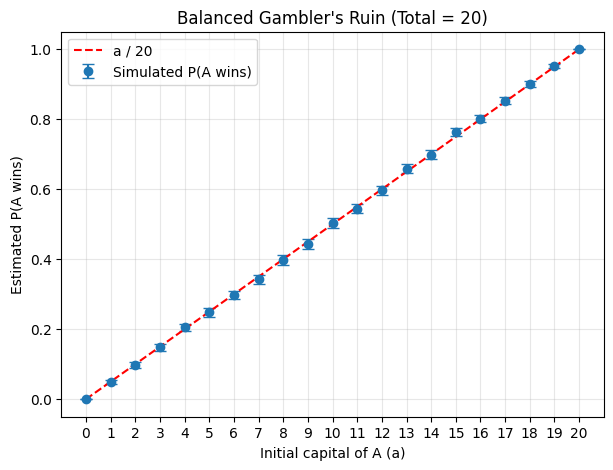

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_one_game(a_start, total=20, rng=None):
    """
    Simulate one gambler's ruin game.
    A starts with a_start, B starts with total - a_start.
    Returns True if A wins, False if A loses.
    """
    if rng is None:
        rng = np.random.default_rng()

    a = a_start  # A's current capital

    # Absorbing states: a == 0 (A ruined), a == total (B ruined)
    while 0 < a < total:
        # Fair game: A wins or loses 1 with probability 1/2
        if rng.random() < 0.5:
            a += 1
        else:
            a -= 1

    return (a == total)  # A wins if they reach total
def estimate_pA_wins(a_start, total=20, R=5000, rng=None):
    """
    Estimate P(A wins) when A starts with a_start out of total.
    Uses R independent simulations.
    Returns (p_hat, se), where se is the standard error.
    """
    if rng is None:
        rng = np.random.default_rng()

    if a_start == 0:
        return 0.0, 0.0  # A is already ruined
    if a_start == total:
        return 1.0, 0.0  # A has all the money, guaranteed win

    wins = 0
    for _ in range(R):
        if simulate_one_game(a_start, total=total, rng=rng):
            wins += 1

    p_hat = wins / R
    se = np.sqrt(p_hat * (1 - p_hat) / R)  # standard error for Bernoulli mean
    return p_hat, se

# Run for all a = 0,...,20
total = 20
R = 5000
rng = np.random.default_rng(123)

a_vals = np.arange(total + 1)
p_hats = []
ses = []

for a in a_vals:
    p_hat, se = estimate_pA_wins(a, total=total, R=R, rng=rng)
    p_hats.append(p_hat)
    ses.append(se)

p_hats = np.array(p_hats)
ses = np.array(ses)

# 95% CI half-widths
z = 1.96
halfwidths = z * ses

plt.figure(figsize=(7,5))

# Monte Carlo estimates with error bars
plt.errorbar(a_vals, p_hats, yerr=halfwidths, fmt='o', capsize=4, label='Simulated P(A wins)')

# Overlay the conjectured linear function a/20
plt.plot(a_vals, a_vals / total, 'r--', label='a / 20')

plt.xlabel("Initial capital of A (a)")
plt.ylabel("Estimated P(A wins)")
plt.title("Balanced Gambler's Ruin (Total = 20)")
plt.xticks(a_vals)
plt.ylim(-0.05, 1.05)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


**(b)** (10 pts) Another question we can ask is how long it takes for either player to get ruined. To study this, simulate the gambler's ruin for a range of values of $a$ and $b$, and use this to try and guess the expected time to ruin.

Note: Convince yourself that the function must be symmetric in $a$ and $b$, so you can assume $a\leq b$. Try plotting the expected absorption times for selected values of $a$, while varying $b$.


<hr>

## Ans.

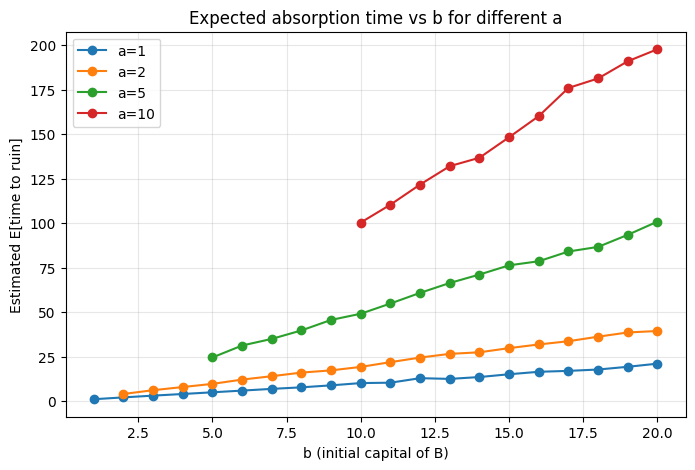

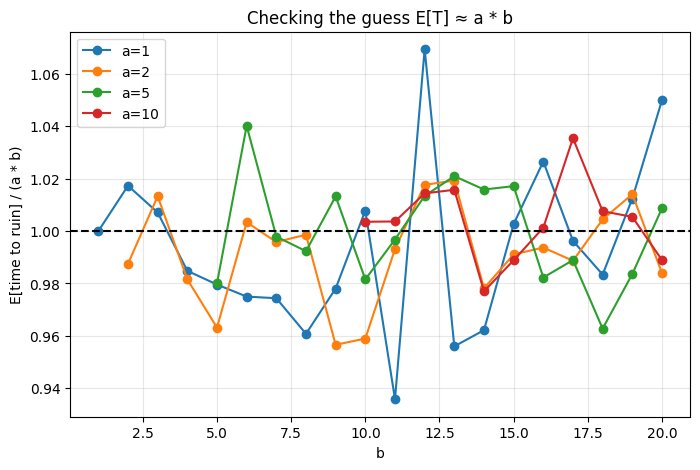

In [ ]:
#First draft written with ChatGPT

import numpy as np
import matplotlib.pyplot as plt

def simulate_time_to_ruin(a_start, b_start, rng=None, max_steps=10_000_000):
    """
    Simulate one gambler's ruin game.
    A starts with a_start, B with b_start.
    Each round: winner gets $1 from loser, fair probability 1/2 each.
    Returns the number of rounds until one player is ruined.
    """
    if rng is None:
        rng = np.random.default_rng()

    total = a_start + b_start
    a = a_start
    t = 0

    # Absorbing states: a == 0 or a == total
    while 0 < a < total and t < max_steps:
        if rng.random() < 0.5:
            a += 1  # A wins $1
        else:
            a -= 1  # A loses $1
        t += 1

    return t
def estimate_expected_time(a_start, b_start, R=5000, rng=None):
    """
    Estimate E[T] where T = time to ruin, via R replications.
    Returns (mean_est, halfwidth) for ~95% CI.
    """
    if rng is None:
        rng = np.random.default_rng()

    times = np.array([simulate_time_to_ruin(a_start, b_start, rng) for _ in range(R)])
    mean_est = times.mean()
    std_est = times.std(ddof=1)

    z = 1.96
    halfwidth = z * std_est / np.sqrt(R)
    return mean_est, halfwidth
rng = np.random.default_rng(123)

a_values = [1, 2, 5, 10]   # selected starting amounts for A
b_max = 20                 # you can push this higher if you want
R = 3000                   # replications per (a,b)

results = {}  # results[(a,b)] = (mean, halfwidth)

for a in a_values:
    for b in range(a, b_max + 1):  # enforce a <= b
        mean_T, hw = estimate_expected_time(a, b, R=R, rng=rng)
        results[(a, b)] = (mean_T, hw)
        # (Optional) print progress
        # print(f"a={a}, b={b}, E[T]≈{mean_T:.1f} ± {hw:.1f}")

plt.figure(figsize=(8,5))

for a in a_values:
    b_vals = np.arange(a, b_max + 1)
    means = np.array([results[(a, b)][0] for b in b_vals])

    plt.plot(b_vals, means, marker='o', label=f"a={a}")

plt.xlabel("b (initial capital of B)")
plt.ylabel("Estimated E[time to ruin]")
plt.title("Expected absorption time vs b for different a")
plt.grid(alpha=0.3)
plt.legend()
plt.show()







<hr><hr>

# Question 3 (Staffing a hospital)


Consider the model of the Fingerlakes Regional Hospital as shown below. New patients arrive at the reception at a rate of 20/hr and emergency patients enter the ER at a rate of 5/hr. The reception desk for non-emergency patients is managed by $n_R$ associates. Admission at the reception (not counting any queueing time) takes 5 minutes on average, regardless of whether the non-emergency patient is first-time or returning. The clinic is served by $d_C$ doctors with an average visit time of 15 minutes. About one in every four patients visiting the clinic are asked to return for a follow-up appointment that is, on average, 3 weeks (504 hours) later in time; another one-tenth of visitors to the clinic are referred to the internal ward (IW); the rest are treated and discharged. Patients arriving to the ER require about 1 hour of time with a doctor. The ER is staffed by $d_E$ doctors. Half of the patients in the ER are discharged after treatment, with the remainder referred to the IW. The average stay in the IW is about 72 hours and there are $n_I$ IW beds available. After a stay at the IW, 20\% of patients are discharged, whereas the rest are asked to return for a follow-up appointment as a non-emergency patient that is, on average, 3 weeks (504 hours) later in time. The reception, clinic, ER and IW all have their separate waiting areas and wait-lists, and serve patients on a FCFS basis.

**(a)** (5 pts)  Find bounds on the number of receptionists $n_R$, IW beds $N_I$, clinic doctors $d_C$ and ER doctors $d_E$ that the hospital requires to ensure it can keep up with its patient load?

$$
\textbf{(a) Stability Bounds on } n_R,\, N_I,\, d_C,\, d_E
$$

$$
\text{Let }
\lambda_R = \text{arrival rate to reception},\quad
\lambda_C = \text{arrival rate to clinic},\quad
\lambda_E = 5,\quad
\lambda_I = \text{arrival rate to IW}.
$$

$\text{External non-emergency arrivals: } 20 \text{ per hour.}$

$\text{Routing fractions:}$
\begin{aligned}
&\text{Clinic: } 1/4 \text{ return},\; 1/10 \to \text{IW},\; 65\% \text{ discharge},\\
&\text{ER: } 1/2 \to \text{IW},\; 1/2 \text{ discharge},\\
&\text{IW: } 80\% \text{ return},\; 20\% \text{ discharge}.
\end{aligned}

$\textbf{Flow balance equations:}$
$$
\begin{aligned}
\lambda_C &= \lambda_R, \\[4pt]
\lambda_I &= 0.1\,\lambda_C + 0.5\,\lambda_E, \\[4pt]
\lambda_R &= 20 + 0.25\,\lambda_C + 0.8\,\lambda_I.
\end{aligned}
$$

$$
\lambda_I = 0.1\,\lambda_R + 2.5.
$$

$\text{Substitute into the reception equation:}$

$$
\begin{aligned}
\lambda_R &= 20 + 0.25\,\lambda_R + 0.8\,(0.1\lambda_R + 2.5) \\
\lambda_R &= 20 + 0.25\lambda_R + 0.08\lambda_R + 2 \\
0.67\,\lambda_R &= 22 \\
\lambda_R &= \frac{2200}{67} \approx 32.84.
\end{aligned}
$$

$$
\lambda_C = \lambda_R = \frac{2200}{67}, \qquad
\lambda_I = 0.1\lambda_R + 2.5 = \frac{775}{134} \approx 5.78.
$$

---

## $\textbf{Service rates}$

$\text{Reception: } 5 \text{ min } = 5/60 \text{ hr},\;
\mu_R = 12.$

$\text{Clinic: } 15 \text{ min } = 0.25 \text{ hr},\;
\mu_C = 4.$

$\text{ER: } 1 \text{ hr},\;
\mu_E = 1.$

$\text{IW: } E[S_I] = 72 \text{ hr.}$

---

## $\textbf{Stability constraints}$

$\textbf{Reception:}$
\begin{aligned}
\lambda_R &< n_R \mu_R = 12 n_R \\
n_R &> \frac{\lambda_R}{12}
     = \frac{2200/67}{12}
     = \frac{550}{201} \approx 2.74.
\end{aligned}
$$

$$
\boxed{n_R \ge 3}
$$

---

## $\textbf{Clinic:}$
\begin{aligned}
\lambda_C &< 4 d_C \\
d_C &> \frac{\lambda_C}{4}
     = \frac{2200/67}{4}
     = \frac{550}{67}
     \approx 8.21.
\end{aligned}
$$

$$
\boxed{d_C \ge 9}
$$

---

## $\textbf{ER:}$
\begin{aligned}
\lambda_E &= 5 < d_E \\
d_E &\ge 6.
\end{aligned}
$$

$$
\boxed{d_E \ge 6}
$$

---

## $\textbf{Internal Ward (IW beds):}$

\text{Using Little’s Law: }
\begin{aligned}
\bar{N}_I
&= \lambda_I E[S_I] \\
&= \frac{775}{134} \cdot 72 \\
&= \frac{27900}{67}
\approx 416.4.
\end{aligned}
$$

\text{To avoid overload:}
$$
N_I > \bar{N}_I \approx 416.4
\qquad\Rightarrow\qquad
\boxed{N_I \ge 417}.
$$

---

## $\textbf{Final Bounds}$

$$
\boxed{
n_R \ge 3,\quad
d_C \ge 9,\quad
d_E \ge 6,\quad
N_I \ge 417.
}
$$

---


<hr>

**(b)** (10 pts) Suppose the hospital chooses to run with $d_E=7$ doctors in the ER, $d_C=10$ doctors in the clinic, and $n=500$ beds in the IW. Approximate the average time spent in the clinic (including treatment but not including reception) and the average number of busy clinic doctors.


$$
\text{From part (a), we found the steady-state flow into the clinic as}
\quad
\lambda_C = \lambda_R = \frac{2200}{67} \approx 32.84\ \text{patients/hr}.
$$

$\text{Clinic service parameters:}$

$$
\text{Mean service time } = 15 \text{ minutes } = 0.25 \text{ hr},
\quad
\mu_C = \frac{1}{0.25} = 4\ \text{patients/hr per doctor}.
$$

$\text{Given } d_C = 10 \text{ clinic doctors, the total service rate is } 10 \cdot \mu_C = 40\ \text{patients/hr.}$

$\text{Traffic intensity per server in the clinic:}$
$$
\rho = \frac{\lambda_C}{d_C \mu_C}
= \frac{\frac{2200}{67}}{10 \cdot 4}
= \frac{2200}{2680}
\approx 0.821.
$$

$\text{We model the clinic as an } M/M/10 \text{ queue with arrival rate } \lambda_C, \text{ service rate } \mu_C.$

$\textbf{Step 1: Compute } P_0 \text{ and } P_{\text{wait}}.$

$$
a = \frac{\lambda_C}{\mu_C} = \frac{2200}{67} \cdot \frac{1}{4} = \frac{550}{67} \approx 8.209.
$$

$$
P_0
= \left[
\sum_{n=0}^{9} \frac{a^n}{n!}
	•	\frac{a^{10}}{10!,(1-\rho)}
\right]^{-1}
\approx 0.000214.
$$

$$
P_{\text{wait}}
= \frac{a^{10}}{10!,(1-\rho)},P_0
\approx 0.457.
$$

$\textbf{Step 2: Mean waiting time in queue and total time in clinic.}$

$$
W_q
= \frac{P_{\text{wait}}}{d_C \mu_C - \lambda_C}
\approx 0.0638\ \text{hr}
\approx 3.8\ \text{min},
$$

$$
W = W_q + \frac{1}{\mu_C}
\approx 0.0638 + 0.25
= 0.3138\ \text{hr}
\approx 18.8\ \text{minutes}.
$$

$\text{So the average time spent in the clinic (waiting + treatment) is about } 0.314 \text{ hr } \approx 18.8 \text{ minutes.}$

⸻

$\textbf{Average number of busy clinic doctors}$

$\text{In an } M/M/d \text{ system, the average number of patients in service is}$
$$
L_s = \frac{\lambda_C}{\mu_C}
= \frac{2200/67}{4}
= \frac{550}{67}
\approx 8.21.
$$

$\text{This is also the average number of \emph{busy} clinic doctors.}$

⸻

$\boxed{\text{Final answers}}$

$$
\text{Average time in clinic (excluding reception): }
W \approx 0.314\ \text{hr} \approx 18.8\ \text{minutes},
$$

$$
\text{Average number of busy clinic doctors: }
L_s \approx 8.21.
$$

<hr>

**(c)** (10 pts) Suppose the hospital chooses to run with $d_E=7$ doctors in the ER, $d_C=10$ doctors in the clinic, and $n=500$ beds in the IW. Compute the probability that the hospital will simultaneously have no patients in the ER and no patients in the clinic.

<hr>

## Ans.

$$
\text{From part (a), we have the steady-state flow into the clinic}
\quad
\lambda_C = \lambda_R = \frac{2200}{67} \approx 32.84\ \text{patients/hr}.
$$

$\text{For the ER, the external emergency arrival rate is}$
$$
\lambda_E = 5\ \text{patients/hr}.
$$

$\text{Service rates (from the problem description):}$
$$
\text{Clinic: } 15 \text{ min} = 0.25\ \text{hr} \Rightarrow \mu_C = 4\ \text{patients/hr per doctor},
\text{ER: } 1 \text{ hr} \Rightarrow \mu_E = 1\ \text{patient/hr per doctor}.
$$
$\text{Given } d_C = 10,, d_E = 7, \text{ we model:}$
	•	$\text{Clinic as an } M/M/10 \text{ queue with } \lambda_C, \mu_C.$
	•	$\text{ER as an } M/M/7 \text{ queue with } \lambda_E, \mu_E.$

$\text{We approximate the network as a Jackson network with independent nodes,}$
$\text{so the joint steady-state probability factors as a product of marginals.}$

⸻

$\textbf{1. Probability clinic is empty } (P_{0,C})$

$\text{Define } a_C = \lambda_C / \mu_C,\ \rho_C = \lambda_C / (d_C \mu_C).$

$$
a_C = \frac{\lambda_C}{\mu_C}
= \frac{\frac{2200}{67}}{4}
= \frac{550}{67}
\approx 8.21,
$$

$$
\rho_C = \frac{\lambda_C}{d_C \mu_C}
= \frac{\frac{2200}{67}}{10 \cdot 4}
= \frac{2200}{2680}
\approx 0.821.
$$

$\text{For an } M/M/d \text{ queue, the probability of zero customers is}$

$P_{0,C}$

$$
\left[
\sum_{n=0}^{d_C-1} \frac{a_C^n}{n!}
	•	\frac{a_C^{d_C}}{d_C!,(1-\rho_C)}
\right]^{-1}.
$$

$\text{Plugging in } d_C = 10,\ a_C \approx 8.21,\ \rho_C \approx 0.821 \text{ gives}$
$$
P_{0,C} \approx 2.14 \times 10^{-4}.
$$

⸻

$\textbf{2. Probability ER is empty } (P_{0,E})$

$\text{Define } a_E = \lambda_E / \mu_E,\ \rho_E = \lambda_E / (d_E \mu_E).$

$$
a_E = \frac{\lambda_E}{\mu_E} = \frac{5}{1} = 5,
\qquad
\rho_E = \frac{\lambda_E}{d_E \mu_E}
= \frac{5}{7}
\approx 0.714.
$$

$\text{For the } M/M/7 \text{ ER queue,}$

$\P_{0,E}$

$$
\left[
\sum_{n=0}^{d_E-1} \frac{a_E^n}{n!}
	•	\frac{a_E^{d_E}}{d_E!,(1-\rho_E)}
\right]^{-1}.
$$

$\text{Plugging in } d_E = 7,\ a_E = 5,\ \rho_E \approx 0.714 \text{ gives}$
$$
P_{0,E} \approx 5.97 \times 10^{-3}.
$$

⸻

$\textbf{3. Probability both ER and clinic are empty}$

$\text{Under the Jackson-network/product-form approximation, the joint probability is}$
$$
P{\text{clinic empty and ER empty}}
= P_{0,C} \cdot P_{0,E}.
$$

$\text{Thus}$
$$
P{\text{no patients in ER and no patients in clinic}}
\approx
(2.14 \times 10^{-4}) \cdot (5.97 \times 10^{-3})
\approx 1.28 \times 10^{-6}.
$$

⸻

$\boxed{\text{Final answer}}$

$$
P{\text{simultaneously no patients in ER and no patients in clinic}}
\approx 1.3 \times 10^{-6}.
$$

<hr>

**(d)** (40 pts) Build a simulator for the above model, assuming the external arrivals to the reception and ER are Poisson processes, and all service times are exponential and all routings are independent. You can re-use any of the code we provided in the recitations.

Use your simulator to study the following:

$(i)$ Plot the total number of patients waiting in the hospital when the number of doctors and beds is $1$ more than your suggestions in part $(a)$, and when it is $1$ less than your suggestions in part $(a)$. You should simulate over a long enough time horizon to be able to determine whether the numbers stabilize, or grow unbounded.

$(ii)$ Simulate the configuration in part $(b)$, and plot the average time spent by patients in the clinic, and the average number of busy clinic doctors. How do these compare to the answers in part $(b)$?

<hr>

## Ans.

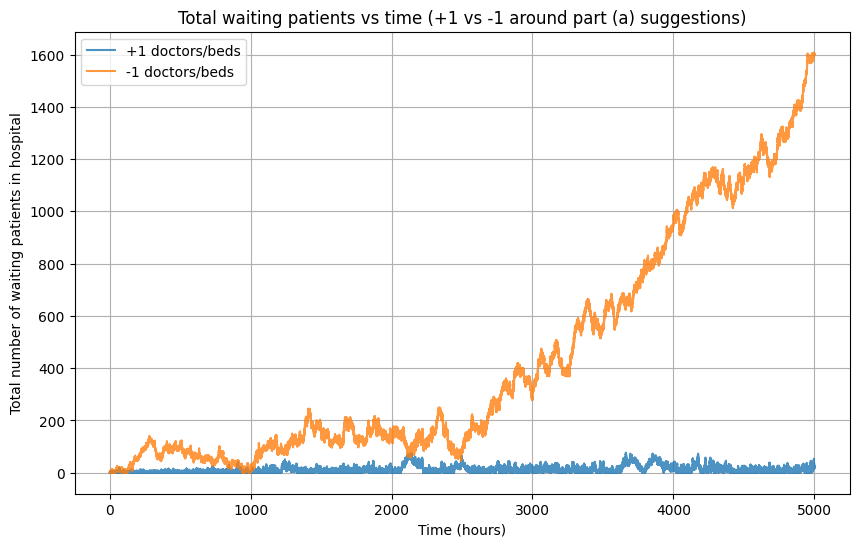

Configuration (part b): d_E=7, d_C=10, N_I=500, n_R=3
Clinic visits measured after warmup: 141946
Average time in clinic (hours): 0.3007
Average time in clinic (minutes): 18.04
Average number of busy clinic doctors: 7.9087

Compare to analytical (part b) approx:
  E[time in clinic] ≈ 0.314 hr ≈ 18.8 min
  E[# busy clinic docs] ≈ 8.21


In [2]:
#code drafted and debugged heavily with chatgpt

import heapq
import random
from collections import deque
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Exponential helper
# -----------------------------
def exp_rv(rate):
    """Generate Exp(rate) with mean 1/rate (rate > 0)."""
    return np.random.exponential(1.0 / rate)


# -----------------------------
# Main simulation function
# -----------------------------
def simulate_system(n_R, d_C, d_E, N_I,
                    T_end=5000.0,
                    warmup=500.0,
                    seed=None,
                    track_waiting_trajectory=False):
    """
    Event-driven simulation of the hospital network.
    Returns a dict with:
      - avg_clinic_time (hr)
      - avg_busy_clinic (time-average number of busy clinic doctors)
      - clinic_visits_measured
      - waiting_times, waiting_counts (if track_waiting_trajectory=True)
    """

    if seed is not None:
        np.random.seed(seed)
        random.seed(seed)

    # --- Rates (per hour) ---
    lambda_ext_R = 20.0       # external arrivals to reception
    lambda_ext_E = 5.0        # external arrivals to ER
    mu_R = 12.0               # reception: mean 5 min
    mu_C = 4.0                # clinic: mean 15 min
    mu_E = 1.0                # ER: mean 1 hr
    mu_I = 1.0 / 72.0         # IW: mean 72 hr
    lambda_follow = 1.0 / 504.0  # follow-up delay: mean 504 hr

    # --- State variables ---
    t = 0.0

    busy_R = 0
    busy_C = 0
    busy_E = 0
    busy_I = 0

    q_R = 0                      # reception queue length
    q_C = deque()                # clinic queue stores arrival_times
    q_E = 0                      # ER queue length
    q_I = 0                      # IW queue length

    # --- Metrics for clinic ---
    clinic_sum_time = 0.0
    clinic_visits_measured = 0

    # Time-average busy clinic doctors
    busy_C_area = 0.0
    last_time = 0.0

    # Waiting trajectory (sum of all queues)
    waiting_times = []
    waiting_counts = []

    def record_waiting():
        if not track_waiting_trajectory:
            return
        total_waiting = q_R + len(q_C) + q_E + q_I
        waiting_times.append(t)
        waiting_counts.append(total_waiting)

    # --- Future event list: (time, counter, event_type, data) ---
    FEL = []
    event_counter = 0

    def schedule_event(time, etype, data=None):
        nonlocal event_counter
        if time > T_end:
            return
        event_counter += 1
        heapq.heappush(FEL, (time, event_counter, etype, data))

    # --- Initial external arrivals ---
    schedule_event(exp_rv(lambda_ext_R), "ext_arr_recep", None)
    schedule_event(exp_rv(lambda_ext_E), "ext_arr_er", None)

    # Record initial waiting
    record_waiting()

    # -----------------------------
    # Event handlers (nested)
    # -----------------------------
    def handle_arrival_recep():
        nonlocal busy_R, q_R
        if busy_R < n_R:
            busy_R += 1
            service_time = exp_rv(mu_R)
            schedule_event(t + service_time, "dep_recep", None)
        else:
            q_R += 1

    def handle_arrival_recep_followup():
        # Same as external to reception, but no new Poisson arrival scheduled
        handle_arrival_recep()

    def handle_arrival_clinic(arrival_time):
        nonlocal busy_C
        # arrival_time = time patient arrives to clinic (for sojourn metric)
        if busy_C < d_C:
            busy_C += 1
            service_time = exp_rv(mu_C)
            # pass arrival_time along to departure event
            schedule_event(t + service_time, "dep_clinic", arrival_time)
        else:
            q_C.append(arrival_time)

    def handle_arrival_er():
        nonlocal busy_E, q_E
        if busy_E < d_E:
            busy_E += 1
            service_time = exp_rv(mu_E)
            schedule_event(t + service_time, "dep_er", None)
        else:
            q_E += 1

    def handle_arrival_iw():
        nonlocal busy_I, q_I
        if busy_I < N_I:
            busy_I += 1
            service_time = exp_rv(mu_I)
            schedule_event(t + service_time, "dep_iw", None)
        else:
            q_I += 1

    def handle_dep_recep():
        nonlocal busy_R, q_R
        # One patient finishes at reception and immediately goes to clinic
        # First free a server (or start next from queue)
        if q_R > 0:
            q_R -= 1
            service_time = exp_rv(mu_R)
            schedule_event(t + service_time, "dep_recep", None)
            # busy_R stays the same (server immediately reused)
        else:
            busy_R -= 1

        # This departing patient arrives to clinic at time t
        handle_arrival_clinic(arrival_time=t)

    def handle_dep_clinic(arrival_time):
        # arrival_time is when this patient first arrived to clinic
        nonlocal busy_C, clinic_sum_time, clinic_visits_measured

        # Update clinic time metric if beyond warmup
        if t >= warmup:
            clinic_sum_time += (t - arrival_time)
            clinic_visits_measured += 1

        # Free clinic doctor or start next from queue
        if q_C:
            next_arrival_time = q_C.popleft()
            # busy_C stays the same
            service_time = exp_rv(mu_C)
            schedule_event(t + service_time, "dep_clinic", next_arrival_time)
        else:
            busy_C -= 1

        # Routing after clinic
        u = random.random()
        if u < 0.25:
            # follow-up to reception after Exp(lambda_follow)
            follow_delay = exp_rv(lambda_follow)
            schedule_event(t + follow_delay, "recv_followup", None)
        elif u < 0.35:
            # to IW
            handle_arrival_iw()
        else:
            # discharged: nothing further
            pass

    def handle_dep_er():
        nonlocal busy_E, q_E
        if q_E > 0:
            q_E -= 1
            service_time = exp_rv(mu_E)
            schedule_event(t + service_time, "dep_er", None)
        else:
            busy_E -= 1

        # Routing after ER
        u = random.random()
        if u < 0.5:
            handle_arrival_iw()
        else:
            # discharged
            pass

    def handle_dep_iw():
        nonlocal busy_I, q_I
        if q_I > 0:
            q_I -= 1
            service_time = exp_rv(mu_I)
            schedule_event(t + service_time, "dep_iw", None)
        else:
            busy_I -= 1

        # Routing after IW
        u = random.random()
        if u < 0.8:
            follow_delay = exp_rv(lambda_follow)
            schedule_event(t + follow_delay, "recv_followup", None)
        else:
            # discharged
            pass

    # -----------------------------
    # Main event loop
    # -----------------------------
    while FEL:
        time, _, etype, data = heapq.heappop(FEL)
        if time > T_end:
            break

        # Time-average busy clinic doctors (integral of busy_C over time)
        # Use left-continuous value of busy_C from last_time -> time
        if time > last_time:
            # Only accumulate after warmup
            start = max(last_time, warmup)
            end = max(min(time, T_end), warmup)
            if end > start:
                busy_C_area += busy_C * (end - start)
            last_time = time

        # Advance time
        t = time

        # Record waiting trajectory at each event
        record_waiting()

        # Dispatch event
        if etype == "ext_arr_recep":
            # external arrival to reception
            handle_arrival_recep()
            # schedule next external arrival
            schedule_event(t + exp_rv(lambda_ext_R), "ext_arr_recep", None)

        elif etype == "recv_followup":
            # follow-up arrival to reception
            handle_arrival_recep_followup()

        elif etype == "dep_recep":
            handle_dep_recep()

        elif etype == "ext_arr_er":
            handle_arrival_er()
            schedule_event(t + exp_rv(lambda_ext_E), "ext_arr_er", None)

        elif etype == "dep_er":
            handle_dep_er()

        elif etype == "dep_clinic":
            handle_dep_clinic(data)  # data = arrival_time

        elif etype == "dep_iw":
            handle_dep_iw()

        else:
            # unknown event type
            pass

    # One last stats update up to T_end (if needed)
    if T_end > last_time:
        start = max(last_time, warmup)
        end = T_end
        if end > start:
            busy_C_area += busy_C * (end - start)

    # --- Compute final metrics ---
    effective_time = max(T_end - warmup, 1e-9)
    avg_busy_clinic = busy_C_area / effective_time

    if clinic_visits_measured > 0:
        avg_clinic_time = clinic_sum_time / clinic_visits_measured
    else:
        avg_clinic_time = float('nan')

    return {
        "avg_clinic_time": avg_clinic_time,
        "avg_busy_clinic": avg_busy_clinic,
        "clinic_visits_measured": clinic_visits_measured,
        "waiting_times": np.array(waiting_times),
        "waiting_counts": np.array(waiting_counts),
    }


# -----------------------------
# (i) +1 and -1 around part (a)
# -----------------------------
def run_part_i():
    # Part (a) suggestions: n_R=3, d_C=9, d_E=6, N_I=417
    # "Doctors and beds" -> vary d_C, d_E, N_I, keep n_R=3 fixed.
    n_R_suggest = 3
    d_C_suggest = 9
    d_E_suggest = 6
    N_I_suggest = 417

    T_end = 5000.0
    warmup = 500.0

    # +1 config
    res_plus = simulate_system(
        n_R=n_R_suggest,
        d_C=d_C_suggest + 1,
        d_E=d_E_suggest + 1,
        N_I=N_I_suggest + 1,
        T_end=T_end,
        warmup=warmup,
        seed=123,
        track_waiting_trajectory=True
    )

    # -1 config
    res_minus = simulate_system(
        n_R=n_R_suggest,
        d_C=d_C_suggest - 1,
        d_E=d_E_suggest - 1,
        N_I=N_I_suggest - 1,
        T_end=T_end,
        warmup=warmup,
        seed=456,
        track_waiting_trajectory=True
    )

    plt.figure(figsize=(10, 6))
    plt.step(res_plus["waiting_times"], res_plus["waiting_counts"],
             where="post", label="+1 doctors/beds", alpha=0.8)
    plt.step(res_minus["waiting_times"], res_minus["waiting_counts"],
             where="post", label="-1 doctors/beds", alpha=0.8)
    plt.xlabel("Time (hours)")
    plt.ylabel("Total number of waiting patients in hospital")
    plt.title("Total waiting patients vs time (+1 vs -1 around part (a) suggestions)")
    plt.legend()
    plt.grid(True)
    plt.show()


# -----------------------------
# (ii) Configuration from part (b)
# -----------------------------
def run_part_ii():
    # Part (b): d_E=7, d_C=10, n=500 IW beds
    # Use n_R=3 (enough to be stable from part (a))
    T_end = 5000.0
    warmup = 500.0

    res = simulate_system(
        n_R=3,
        d_C=10,
        d_E=7,
        N_I=500,
        T_end=T_end,
        warmup=warmup,
        seed=789,
        track_waiting_trajectory=False
    )

    print("Configuration (part b): d_E=7, d_C=10, N_I=500, n_R=3")
    print(f"Clinic visits measured after warmup: {res['clinic_visits_measured']}")
    print(f"Average time in clinic (hours): {res['avg_clinic_time']:.4f}")
    print(f"Average time in clinic (minutes): {res['avg_clinic_time']*60:.2f}")
    print(f"Average number of busy clinic doctors: {res['avg_busy_clinic']:.4f}")
    print()
    print("Compare to analytical (part b) approx:")
    print("  E[time in clinic] ≈ 0.314 hr ≈ 18.8 min")
    print("  E[# busy clinic docs] ≈ 8.21")


# -----------------------------
# Run both parts
# -----------------------------
if __name__ == "__main__":
    run_part_i()
    run_part_ii()

## Citations

First draft of code and troubleshooting generated with AI when indicated. ChatGPT translated handwritten notes to latex code.

---


---

---

---

---

---

---

---

---

---

---

---